In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [17]:
import pandas as pd
import corner
import matplotlib.pyplot as plt
plt.style.use("default")
import numpy as np
from matplotlib import rcParams



In [18]:
# 需要先删除 # 号
df = pd.read_csv('gw231123_posterior.dat', delim_whitespace=True)

/tmp/ipykernel_10658/1647029479.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('gw231123_posterior.dat', delim_whitespace=True)


In [19]:
columns_to_plot_corner = ['Mf', 'af', 'RQC_alpha']
data_corner_with_alpha = df[columns_to_plot_corner].values

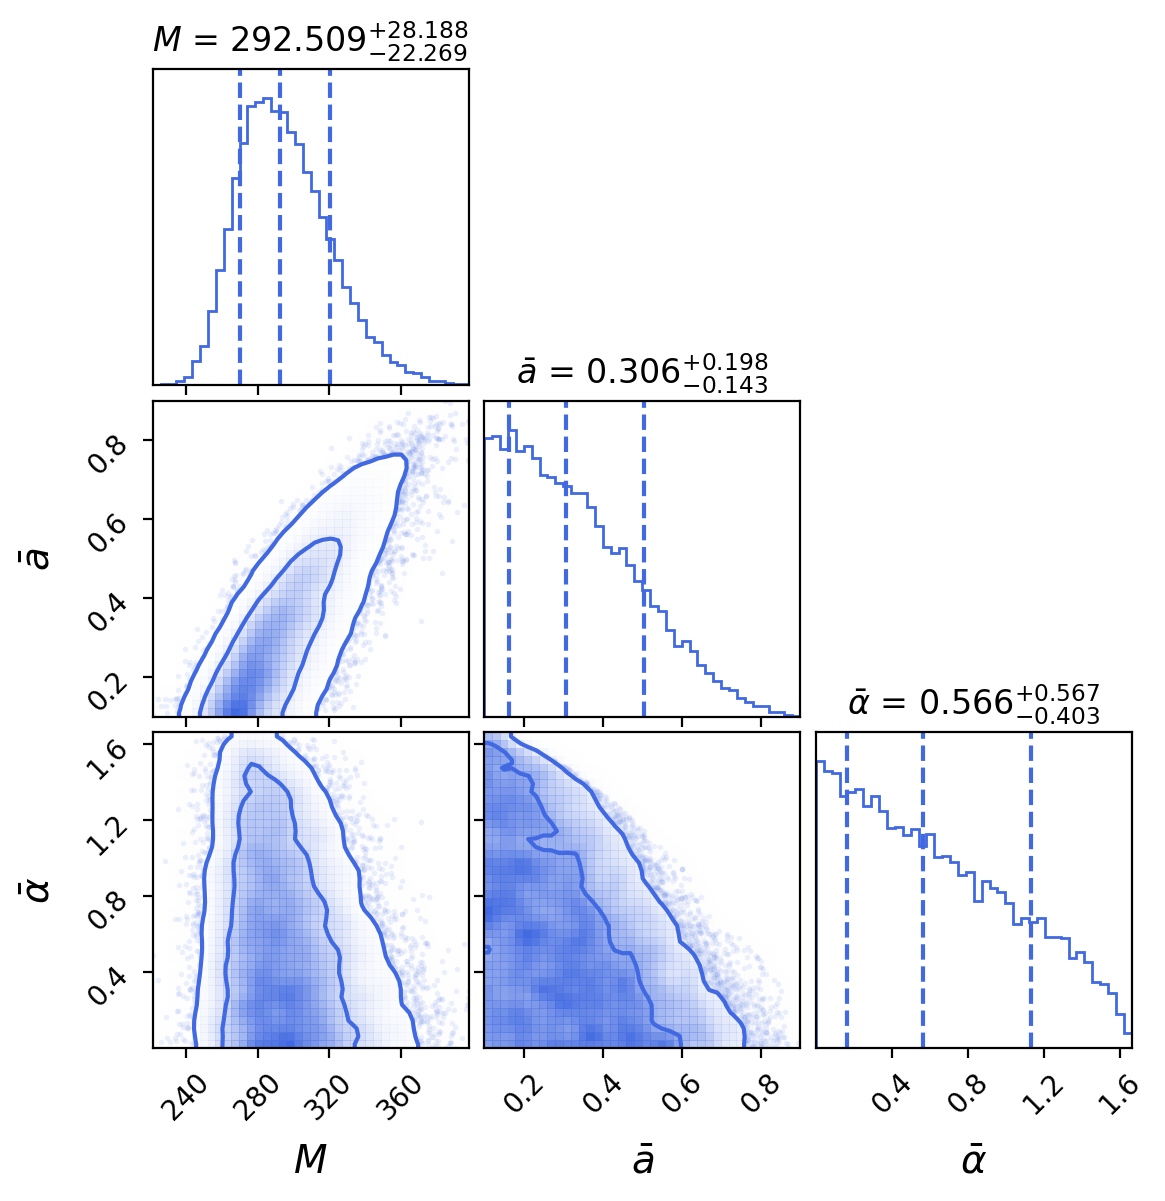

In [20]:
# 绘制 corner 图

corner_figure_with_alpha = corner.corner(
    data_corner_with_alpha,
    labels=[r"$M$", r"$\bar{a}$", r"$\bar{\alpha}$"],
    bins=40,
    show_titles=True,
    quantiles=[0.16, 0.5, 0.84],
    levels=(0.68, 0.95),
    title_fmt=".3f",
    smooth=1.0,
    label_kwargs=dict(fontsize=14),
    title_kwargs=dict(fontsize=12),
    color="royalblue"
)
corner_figure_with_alpha.set_size_inches(6, 6)
# corner_figure.suptitle("(a) GW150914", fontsize=16, y=0.01)

plt.show()

In [21]:
columns_to_plot_compared = ['Mf', 'af']
data_RQC_for_compared = df[columns_to_plot_compared].values

In [22]:
data_IMR_for_compared = pd.read_csv('GW190521_GWOSC_NRSur7dq4_Mf_af_samples.txt', delim_whitespace=True).values

/tmp/ipykernel_10658/222216068.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_IMR_for_compared = pd.read_csv('GW190521_GWOSC_NRSur7dq4_Mf_af_samples.txt', delim_whitespace=True).values


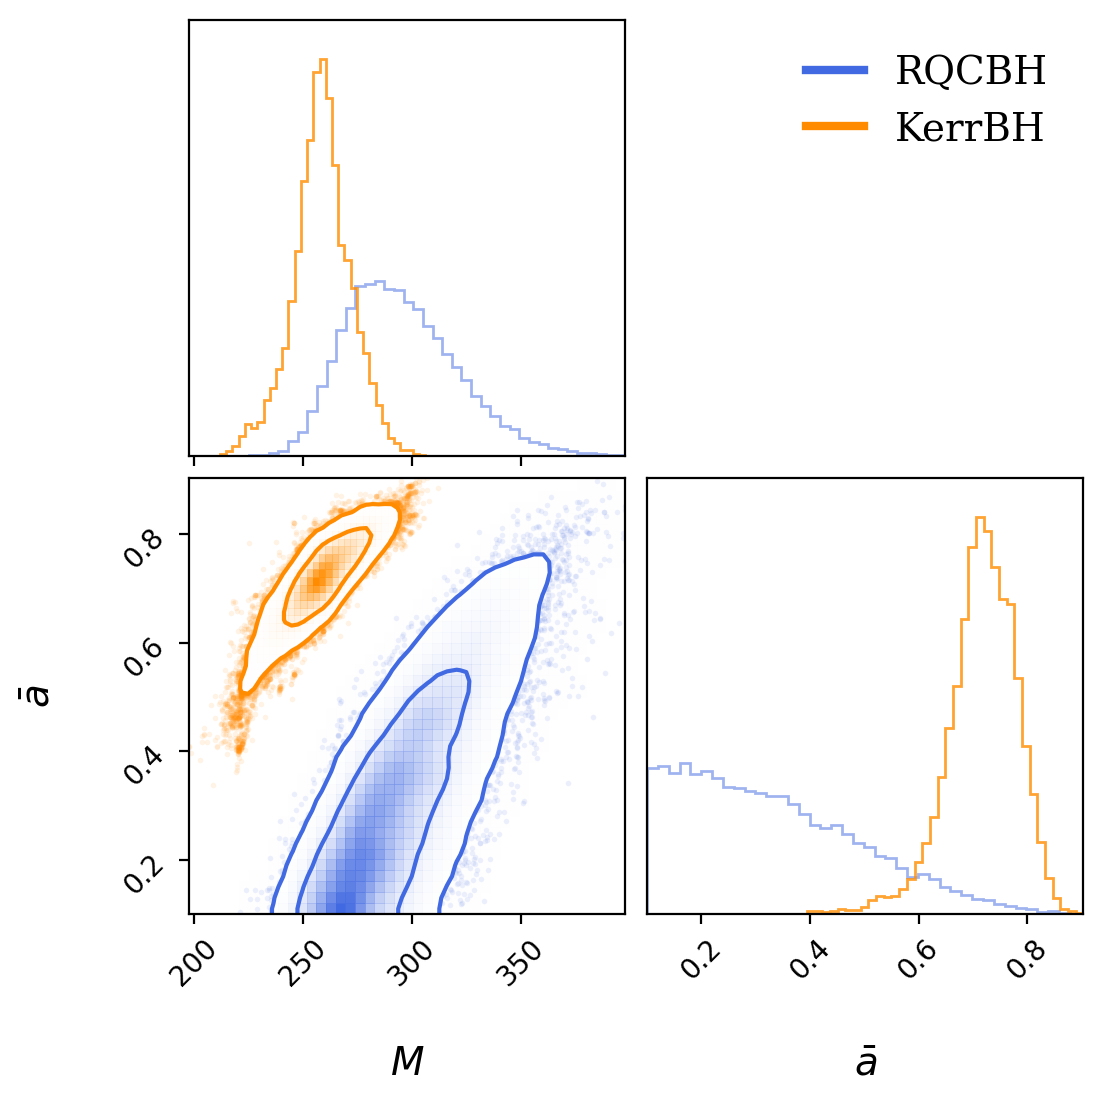

In [23]:


# ========= 第一个 corner 图 =========
compared_figure = corner.corner(
    data_RQC_for_compared,
    labels=[r"$M$", r"$\bar{a}$"],
    color="royalblue",
    bins=40,
    smooth=1.0,
    # quantiles=[0.16, 0.5, 0.84],
    # show_titles=True,
    levels=(0.68, 0.95),
    title_fmt=".3f",
    fill_contours=False,
    plot_datapoints=True,
    label_kwargs=dict(fontsize=14),
    title_kwargs=dict(fontsize=12),
    hist_kwargs=dict(density=True, alpha=0.5, color="royalblue"),
    contour_kwargs=dict(colors=["royalblue"]),
)

# ========= 第二个 corner 图（叠加） =========
corner.corner(
    data_IMR_for_compared, 
    fig=compared_figure,                   # 指定同一个 figure！
    color="darkorange",
    bins=40,
    smooth=1.0,
    # quantiles=[0.16, 0.5, 0.84],
    levels=(0.68, 0.95),
    fill_contours=False,          # 不填充，只画线条更清晰
    plot_datapoints=True,
    label_kwargs=dict(fontsize=14),
    title_kwargs=dict(fontsize=12),
    hist_kwargs=dict(density=True, alpha=0.8, color="darkorange"),
    contour_kwargs=dict(colors=["darkorange"]),
)

axes = np.array(compared_figure.axes).reshape((2, 2))  # 对应 3 维数据 → 3x3 子图
ax = axes[0, -1]  # 右上角子图

ax.plot([], [], color="royalblue", label="RQCBH", linewidth=3)
ax.plot([], [], color="darkorange", label="KerrBH", linewidth=3)

ax.legend(
    loc="upper right",
    prop={'family': 'Serif', 'size': 14},
    frameon=False,
    handlelength=1.5
)

compared_figure.set_size_inches(6, 6)


plt.show()


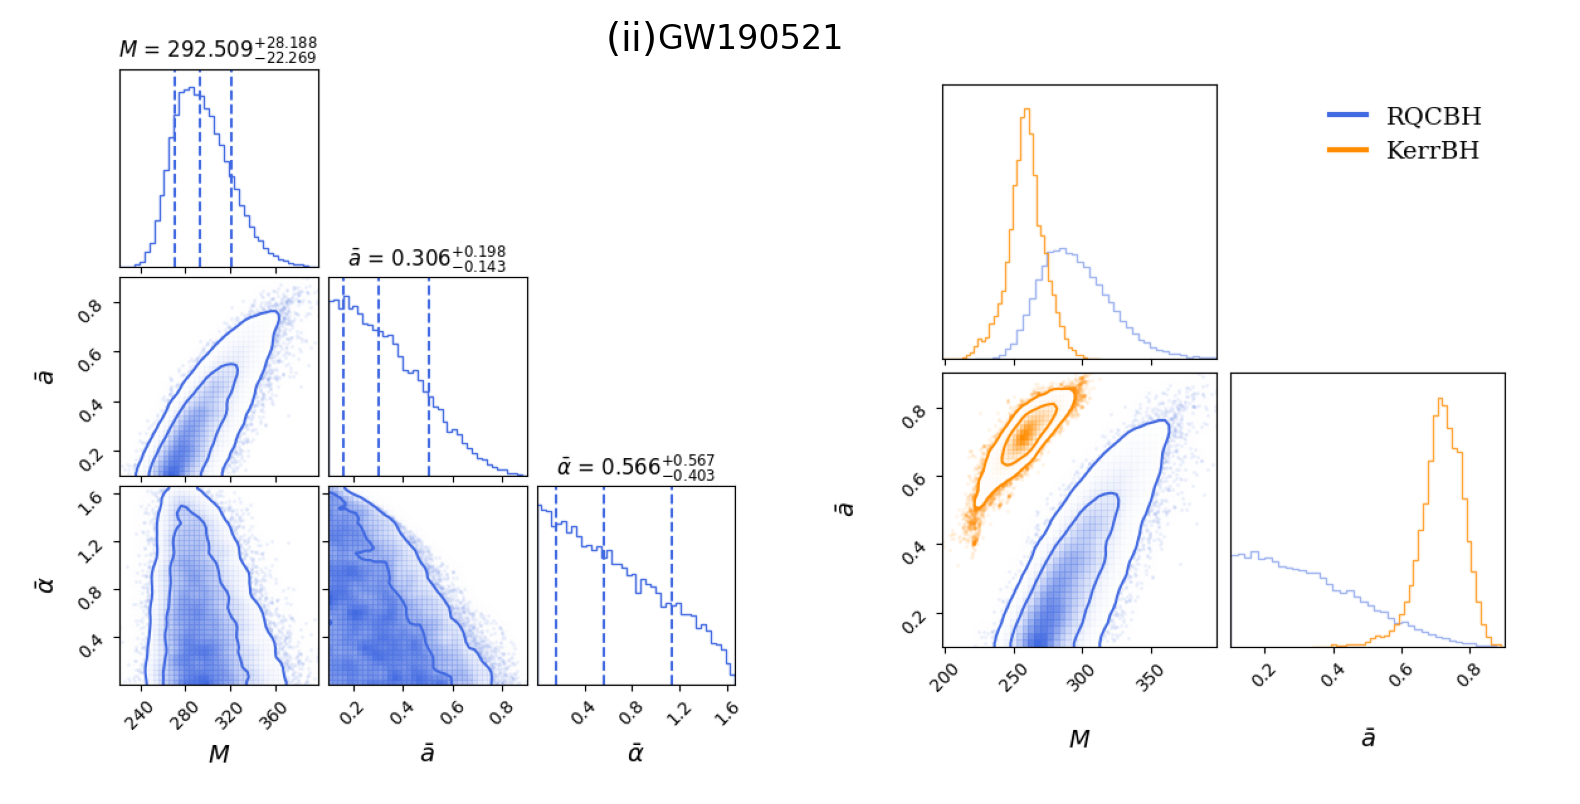

In [24]:
# 把两个 figure 转成图像
corner_figure_with_alpha.canvas.draw()
compared_figure.canvas.draw()

img1 = np.array(corner_figure_with_alpha.canvas.renderer.buffer_rgba())
img2 = np.array(compared_figure.canvas.renderer.buffer_rgba())

# 并排显示
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].imshow(img1)
axes[1].imshow(img2)

for ax in axes:
    ax.axis('off')

fig.text(
    0.4, 0.73,                 # 文字位置（x, y 坐标）
    r"$\mathrm{(ii)}$",            # 内容
    fontsize=14,
    color = 'black',
    va='center', ha='center' # 对齐方式 vertical/horizontal
)

fig.text(
0.475, 0.73,                 # 文字位置（x, y 坐标）
f"GW190521",            # 内容
fontsize=12,
color = 'black',
va='center', ha='center' # 对齐方式 vertical/horizontal
)

plt.tight_layout()
plt.show()

In [25]:
fig.savefig('gw190521.pdf', dpi=300, bbox_inches='tight')